**1.Coursera:**


---


Coursera Inc.is a U.S.-based massive open online course provider founded in 2012 by Stanford University computer science professors Andrew Ng and Daphne Koller. Coursera works with universities and other organizations to offer online courses, certifications, and degrees in a variety of subject

**1.1Dataset**

---
The dataset is taken from kaggle.com [Coursera Course Dataset.](https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset)


**1.2About the Dataset**

---

This dataset contains mainly 6 columns and 890 course data. The detailed description:

course_title : Contains the course title.

course_organization : It tells which organization is conducting the courses.

courseCertificatetype : It has details about what are the different certifications available in courses.

course_rating : It has the ratings associated with each course.

course_difficulty : It tells about how difficult or what is the level of the course.

coursestudentsenrolled : It has the number of students that are enrolled in the course.

**1.3Aim**

---
Our project aims to help any new learner get the right course to learn by just answering a few questions.


**1.4objective**

---
Practice performing basic EDA.

Practice visualizing data with Matplotlib & Seaborn.

Practice reading data, performing queries and filtering data using Panda


**2.Data Loading**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import scipy.stats as sps
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [36]:
df=pd.read_csv("/content/coursea_data.csv")
df=df.drop("Unnamed: 0",axis=1)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


**2.1 Basic checks**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.9+ KB


In [38]:
df.describe()

,course_rating
count,891.000000
mean,4.677329
std,0.162225
min,3.300000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


In [39]:
df.shape

(891, 6)

In [40]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!= 'O']
print('Number of numerical variables:', len(numerical_features))

Number of numerical variables: 1


In [41]:
numerical_features

['course_rating']

In [42]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes== 'O']
print('Number of categorical variables:', len(categorical_features))


Number of categorical variables: 5


In [43]:
categorical_features

['course_title',
 'course_organization',
 'course_Certificate_type',
 'course_difficulty',
 'course_students_enrolled']

##3.Data Wrangling

*   Deleting first Unnamed column
*   Converting data into a suitable data type
*   Hnadling Missing Values
*   Removing Duplicates
*   Finding Outliers










***3.1 Converting Data into Suitable D type*** 




In [44]:
#change k to 1000 and M to 100000 and change datatype
df['course_students_enrolled']=df['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['course_students_enrolled'][:5]

0      5300
1     17000
2    130000
3     91000
4    320000
Name: course_students_enrolled, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


made some changes to the course_students_enrolled and converted into numeric

---

Finally, The dataset contains 4 cagtegorical features, that is course title, difficulty level, organization providing the course and types of certification and 2 numeric Data types such as course_rating and course_students_enrolled

**3.2 Handling Missing Values**

In [46]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(),4), ' % missing values')

The students enrolled got misssing values about 0.01 percentage

In [47]:
# filling missing values with mean
median_value=df['course_students_enrolled'].median()

df['course_students_enrolled'].fillna(value=median_value, inplace=True)

In [48]:
features_with_na

[]

all the misssing values are filled 

**3.2 Removing Duplicates**

In [49]:
df.duplicated().sum()


0

The Dataset has no duplicated values

**3.3 Finding Outliers**

---

Outliers are measure that significantly differ from other data points. For this method the following two techniques are used to detect outliers

Interquartile Range(IQR)

visualization with Box Plot

IQR is a measure of statistical dispersion.


IQR=Q3−Q1

In [50]:
#q1, and q3 represents 25th and 75th percentile respectively
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)


In [51]:
#determine iqr
iqr =  q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [52]:
#determining the lower bound

lower_bound

course_rating                    4.3
course_students_enrolled   -105500.0
dtype: float64

In [53]:
#determining the upper bound
upper_bound

course_rating                    5.1
course_students_enrolled    222500.0
dtype: float64

In [54]:
data_ol= ((df < (q1 - 1.5 * iqr)) |(df> (q3 + 1.5 * iqr)))
data_ol[data_ol == True].count()


course_Certificate_type      0
course_difficulty            0
course_organization          0
course_rating               17
course_students_enrolled    78
course_title                 0
dtype: int64

In the above graph, can clearly see the outliers in course_rating and the course_students_enrolled 


In [55]:


def box_plot(plot_type:str, data:pd.DataFrame, feature:str,title:str,label:str,label2:str=''):
                      
                    
    ax = None
    plt.figure(figsize=(8,5))
    plt.boxplot(data =data , x = feature)
    plt.xlabel(label2)
    plt.ylabel(label)
    plt.title(title)
   
    if ax is not None:
        for t in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_height()/len(data))
            x = t.get_x() + p.get_width() - 0.5
            y =t.get_height() + 0.1
            ax.annotate(percentage, (x, y))
    plt.show()

Box plots are useful as they show outliers within a data set. An outlier is an observation that is numerically distant from the rest of the data. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.


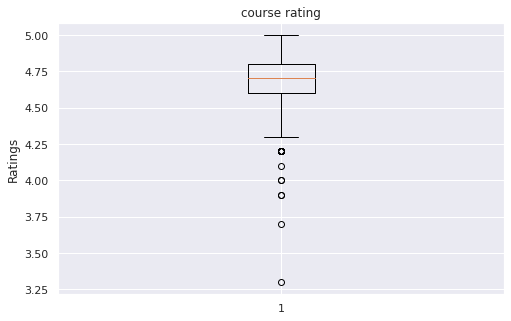

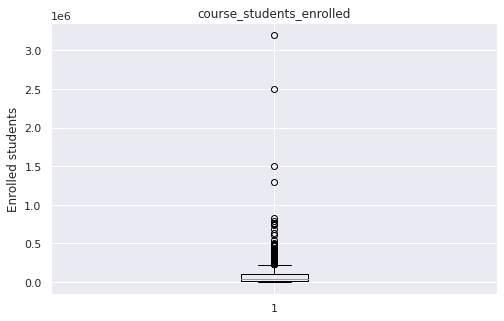

In [56]:
box_plot('boxplot', df, 'course_rating', 'course rating', 'Ratings')
box_plot('boxplot', df, 'course_students_enrolled','course_students_enrolled', 'Enrolled students')

In [57]:
# removig the outliers
data_ol=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [58]:


data_ol = ((data_ol< (q1 - 1.5 * iqr)) |(data_ol> (q3 + 1.5 * iqr)))
print(data_ol[data_ol == True].count())
print('the Original shape of the Dataset:',df.shape)

print('the Dataset after outlier detection:',data_ol.shape)




course_Certificate_type     0
course_difficulty           0
course_organization         0
course_rating               0
course_students_enrolled    0
course_title                0
dtype: int64
the Original shape of the Dataset: (891, 6)
the Dataset after outlier detection: (797, 6)


The outliers has been removed and the difference will be seen before and after removing the dataset shape.


## 3. Exploratory Data Analysis.

Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods

---




**3.1 Course Rating**

Text(0.5, 1.0, '\ncourse Rating Distribution')

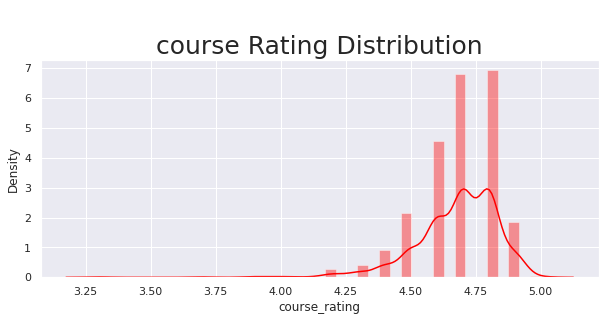

In [59]:
sns.set(rc={'figure.figsize':(10,4)})
r=sns.distplot(df['course_rating'],color='red',label="label 1")
r.axes.set_title("\ncourse Rating Distribution",fontsize=25)

***Findings:***

Average course rating is quite higher, compared to lowest and maximum value.


**3.2 Certification Types**

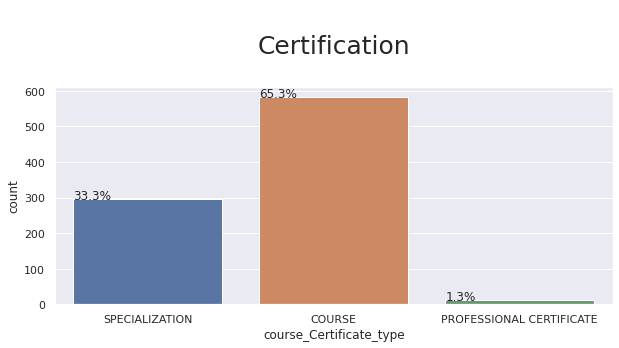

In [60]:
#using count plot to see most popular certification types
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.countplot(data = df, x = 'course_Certificate_type')
ax.axes.set_title("\nCertification\n",fontsize=25)

for k in ax.patches:
            percentage = '{:.1f}%'.format(100 * k.get_height()/len(df))
            x = k.get_x() 
            y = k.get_height()
            ax.annotate(percentage, (x, y))
plt.show()




***Findings:***

The above plot conveys that normal course certificates are more popular than professional and specialization certificates.


**3.3 Course Difficulty**

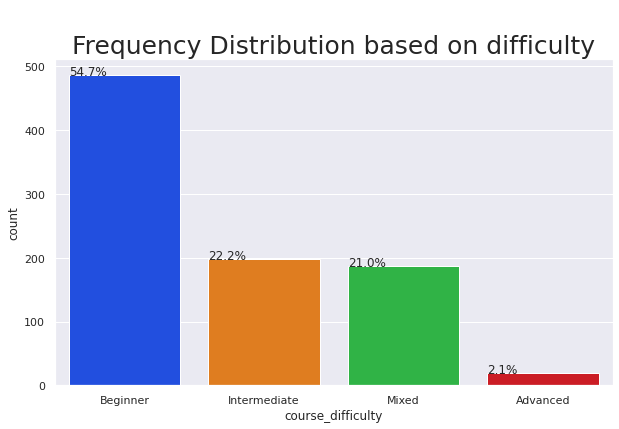

In [61]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.countplot( x="course_difficulty",data=df,palette="bright")
ax.axes.set_title("\nFrequency Distribution based on difficulty",fontsize=25)


for k in ax.patches:
            percentage = '{:.1f}%'.format(100 * k.get_height()/len(df))
            x = k.get_x() 
            y = k.get_height()
            ax.annotate(percentage, (x, y))
plt.show()


***Findings***

In the above chart we can clearly see that , the beginner level courses are most popular in online studies with about 55%




**3.4 Ratings based on course difficulty**

Text(0.5, 1.0, '\n Rating based on difficulty\n')

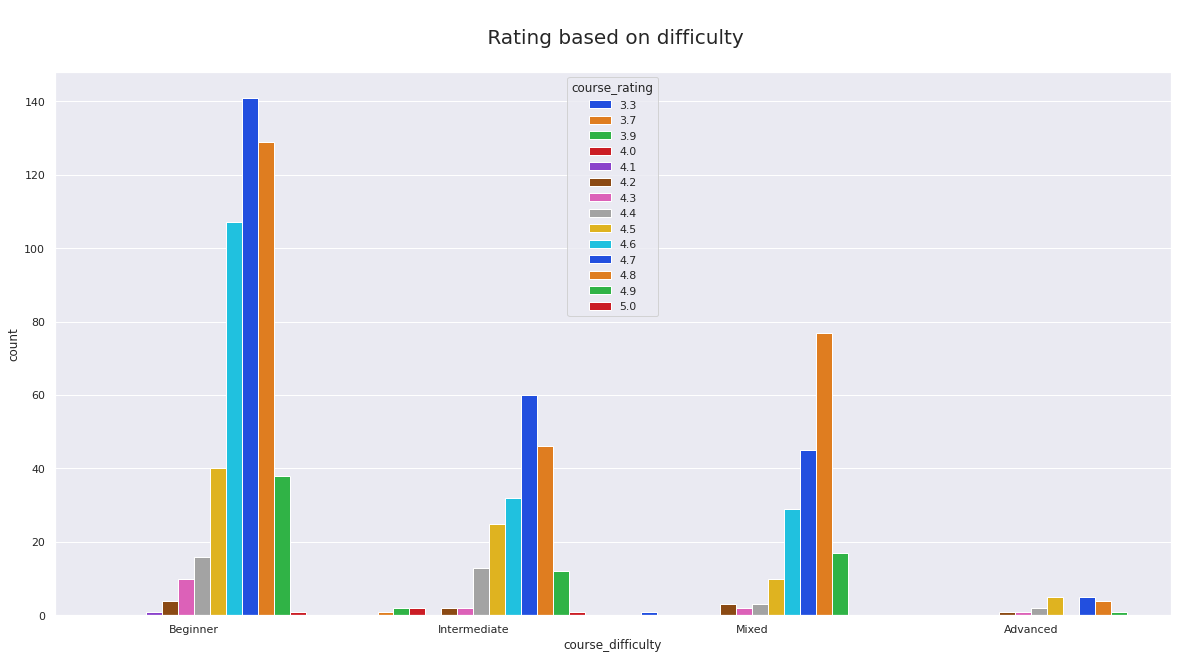

In [62]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_difficulty", data=df,palette="bright")
ax.axes.set_title("\n Rating based on difficulty\n",fontsize=20)


***Findings:***

Advanced courses' ratings are low due to may be less enrollments 

Beginner course is most popular and got maximum ratings due to high frequency

Intermidiate course's and Mixed course's ratings indicate few people who wants upgrade their skills will be joining and the ratings are above average it may due to the size of enrollment




**3.5 Course difficulty based on certification**

Text(0.5, 1.0, '\n Course type distribution\n')

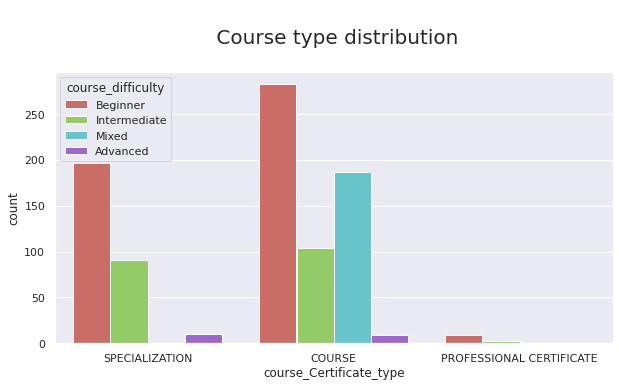

In [63]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(hue="course_difficulty", x="course_Certificate_type", data=df,palette="hls")
ax.axes.set_title("\n Course type distribution\n",fontsize=20)

***Findings:***

Mixed - Course has a right skewed distribution and most popular is beginner level

***3.6 Top Course Providers***

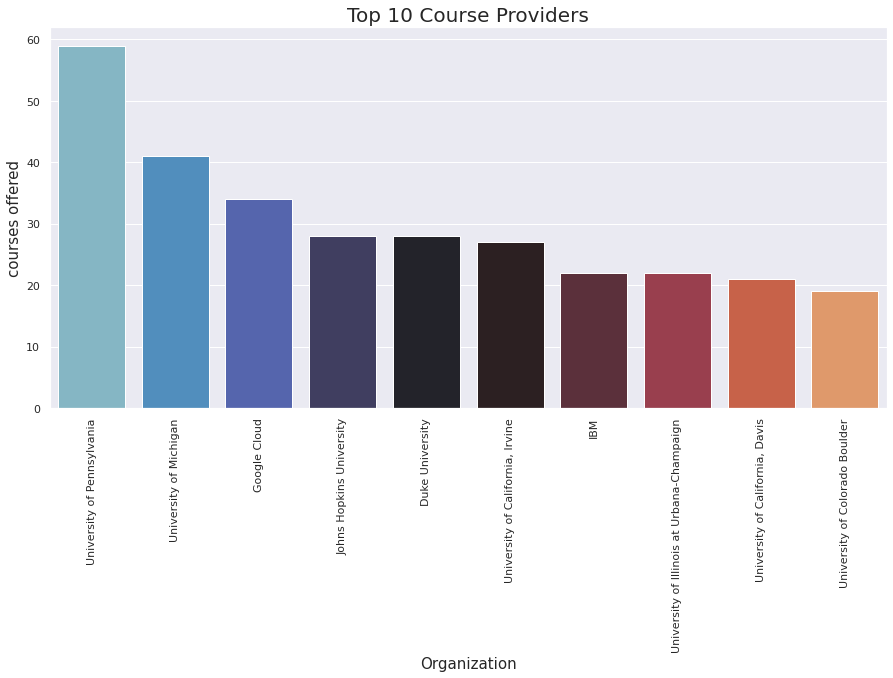

In [64]:
#Top 10 organizations based on courses offered
Ten_org = pd.DataFrame(df['course_organization'].value_counts()).head(10)

sns.barplot(x = Ten_org.index, y = Ten_org['course_organization'],palette='icefire')

labels =Ten_org.index.tolist()
plt.gcf().set_size_inches(15,7)

plt.title('Top 10 Course Providers', fontsize = 20)
plt.xlabel('Organization', fontsize = 15)
plt.ylabel('courses offered', fontsize = 15)

plt.xticks(np.arange(10) ,labels =labels,rotation = 90)
plt.show()

***Findings***

University of Pennslyvania produces largest number of courses offered on coursera.

**3.7 Most Popular Course providers**

In [65]:
student_enrol= pd.DataFrame(df.groupby('course_organization')['course_students_enrolled'].sum())

pd.DataFrame(student_enrol.sort_values(by='course_students_enrolled',ascending = False)).head(10)

,course_students_enrolled
course_organization,
University of Michigan,7437700
University of Pennsylvania,5501300
Stanford University,4854000
"University of California, Irvine",4326000
Johns Hopkins University,4298900
Duke University,3967600
Yale University,3952000
IBM,2956400
deeplearning.ai,2863400


**Findings**

top 10 providers of coursera according to the student enrollments.

**3.8 Enrolment based on rating**

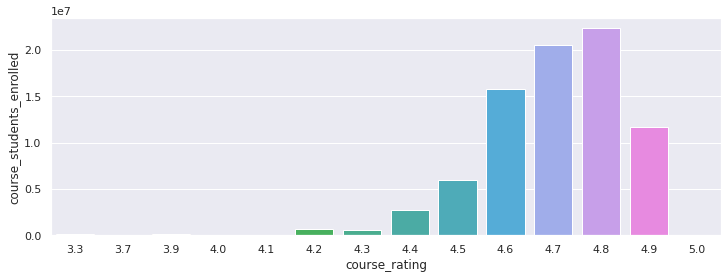

In [78]:
rating = df.groupby('course_rating')['course_students_enrolled'].sum().sort_values()
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x = rating.index, y = rating)
plt.show()

**Findings**

The ratings playing an important role for student to choose the courses on the platform


**3.9 Popular Courses with rating**

(array([0., 1., 2., 3., 4., 5., 6.]),
 <a list of 7 Text major ticklabel objects>)

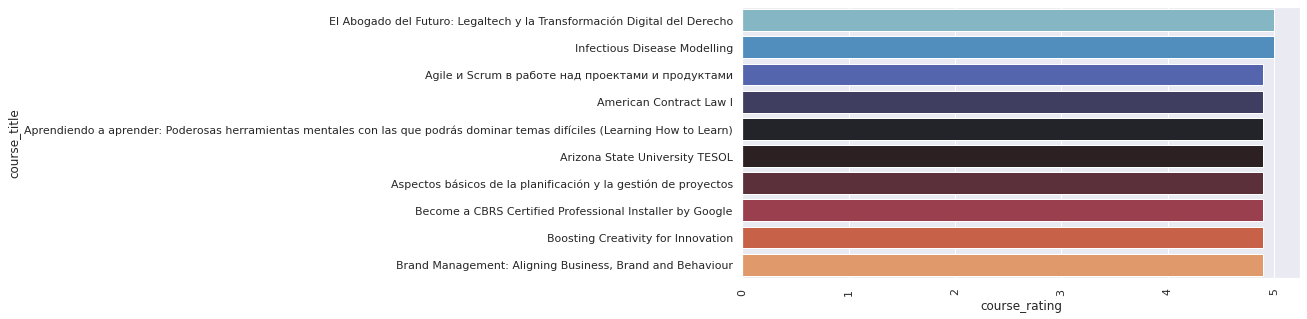

In [69]:
#Top 10 courses based on rating
popular_course=df[['course_organization','course_title','course_rating']]
top_courses = popular_course.nlargest(10,['course_rating'])
sns.barplot(y = top_courses['course_title'], x = top_courses['course_rating'],orient='h',palette='icefire')
plt.xticks(rotation = 90)

In [70]:
top_courses

,course_organization,course_title,course_rating
251,Universidad Austral,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Imperial College London,Infectious Disease Modelling,5.0
36,ScrumTrek,Agile и Scrum в работе над проектами и продуктами,4.9
40,Yale University,American Contract Law I,4.9
61,University of California San Diego,Aprendiendo a aprender: Poderosas herramientas...,4.9
65,Arizona State University,Arizona State University TESOL,4.9
70,University of Virginia,Aspectos básicos de la planificación y la gest...,4.9
82,Google - Spectrum Sharing,Become a CBRS Certified Professional Installer...,4.9
98,HEC Paris,Boosting Creativity for Innovation,4.9
99,London Business School,"Brand Management: Aligning Business, Brand and...",4.9


**Findings:**

There's only two courses with a rating of 5.0


**3.10 Popular Courses with student enrolments**

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]), <a list of 8 Text major ticklabel objects>)

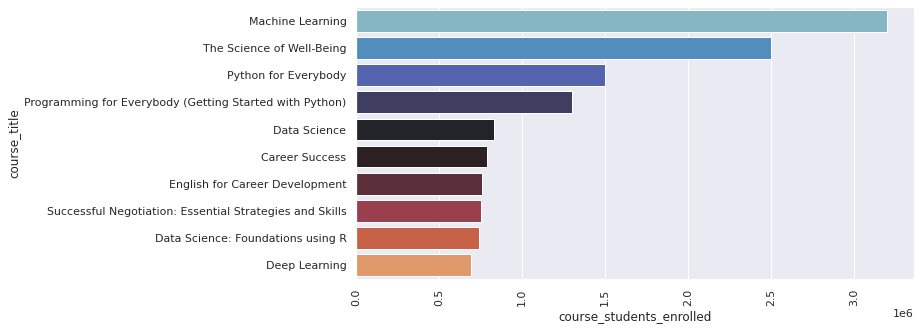

In [71]:
stu_course=df[['course_organization','course_title','course_students_enrolled']]
stu_enrol = stu_course.nlargest(10,['course_students_enrolled'])
sns.barplot(y = stu_enrol['course_title'], x =stu_enrol['course_students_enrolled'],orient='h',palette='icefire')
plt.xticks(rotation = 90)

In [72]:
stu_enrol

,course_organization,course_title,course_students_enrolled
564,Stanford University,Machine Learning,3200000
815,Yale University,The Science of Well-Being,2500000
688,University of Michigan,Python for Everybody,1500000
674,University of Michigan,Programming for Everybody (Getting Started wit...,1300000
196,Johns Hopkins University,Data Science,830000
129,"University of California, Irvine",Career Success,790000
261,University of Pennsylvania,English for Career Development,760000
765,University of Michigan,Successful Negotiation: Essential Strategies a...,750000
199,Johns Hopkins University,Data Science: Foundations using R,740000
211,deeplearning.ai,Deep Learning,690000


***Findings***


Machine learning is the top course the students instrested in enrolling

**3.11 difficult levels vs student enrollment**

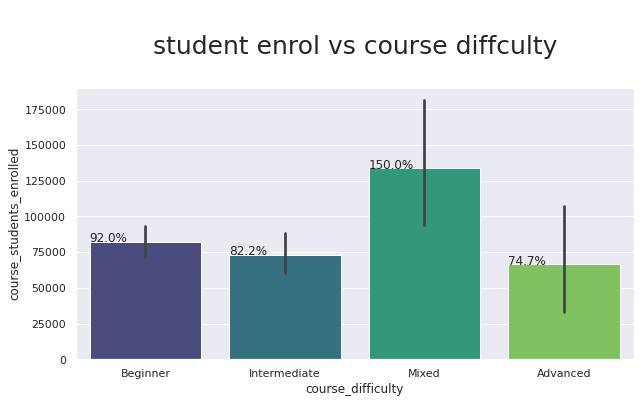

In [73]:
ax=sns.barplot('course_difficulty','course_students_enrolled',data=df,palette='viridis')
ax.axes.set_title("\nstudent enrol vs course diffculty\n",fontsize=25)
for k in ax.patches:
            percentage = '{:.1f}%'.format(1* k.get_height()/len(df))
            x = k.get_x() 
            y = k.get_height()
            ax.annotate(percentage, (x, y))
plt.show()

***Findings:***

mostly students are enrolled in the mixed level

**3.12 student enrollment based on rating and difficulty**

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000.]), <a list of 8 Text major ticklabel objects>)

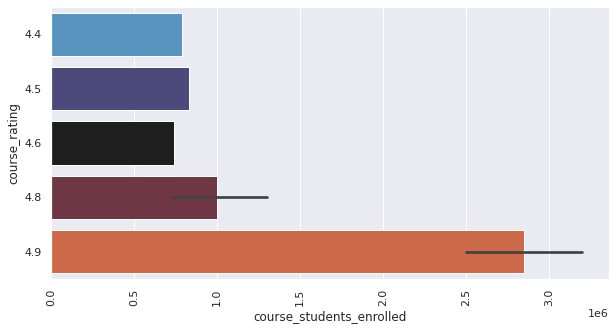

In [74]:
stu_course1=df[['course_difficulty','course_rating','course_students_enrolled']]
stu_enrol1 = stu_course1.nlargest(10,['course_students_enrolled'])
sns.barplot(y = stu_enrol1['course_rating'], x =stu_enrol1['course_students_enrolled'],orient='h',palette='icefire')
plt.xticks(rotation = 90)

In [75]:
stu_enrol1 

,course_difficulty,course_rating,course_students_enrolled
564,Mixed,4.9,3200000
815,Mixed,4.9,2500000
688,Beginner,4.8,1500000
674,Mixed,4.8,1300000
196,Beginner,4.5,830000
129,Beginner,4.4,790000
261,Mixed,4.8,760000
765,Mixed,4.8,750000
199,Beginner,4.6,740000
211,Intermediate,4.8,690000


**Findings:**

mostly the students enrolled with the rating which is above 4 and prefer to join mixed level

**3.13 Finding keyword**

In [144]:
def keyword(df,feature, key):
    
    a=df[feature].str.find(key) != -1
    return df[a]
ml = keyword(df, 'course_title', 'Machine Learning')
ml

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
28,Advanced Machine Learning,National Research University Higher School of ...,SPECIALIZATION,4.5,Advanced,190000
29,Advanced Machine Learning with TensorFlow on G...,Google Cloud,SPECIALIZATION,4.5,Advanced,35000
57,Applied Machine Learning in Python,University of Michigan,COURSE,4.6,Intermediate,150000
193,"Data Engineering, Big Data, and Machine Learni...",Google Cloud,SPECIALIZATION,4.6,Intermediate,120000
200,Data Science: Statistics and Machine Learning,Johns Hopkins University,SPECIALIZATION,4.4,Intermediate,210000
375,Getting Started with AWS Machine Learning,Amazon Web Services,COURSE,4.5,Intermediate,73000
389,Google Cloud Platform Big Data and Machine Lea...,Google Cloud,COURSE,4.6,Intermediate,120000
520,Introduction to TensorFlow for Artificial Inte...,deeplearning.ai,COURSE,4.7,Intermediate,150000
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000
532,Investment Management with Python and Machine ...,EDHEC Business School,SPECIALIZATION,4.6,Beginner,14000


**3.14 Finding highest and lowest ratign course**

In [86]:
def findingratg(data, feature,key:str):
    

    result = feature + key
    return df.query(result)

In [90]:
findingratg(df, 'course_rating', '==5')[['course_title', 'course_rating']].sort_values('course_rating')

,course_title,course_rating
251,El Abogado del Futuro: Legaltech y la Transfor...,5.0
432,Infectious Disease Modelling,5.0


In [95]:
findingmin(df, 'course_rating', '<3.5')[['course_title', 'course_rating']].sort_values('course_rating')

,course_title,course_rating
413,How To Create a Website in a Weekend! (Project...,3.3


**Findings**

The above analysis indicates the coursera provides quality courses and the ratings arer started with above 3




**4. Conclusion:**



*   Average course rating is quite higher, compared to lowest and maximum value. So, the cours quality is being maintained.

*  Advanced courses' rating has some ups-and downs; maybe due to low frequency

*  Beginner course has distribution quite similiar to total rating chart, as big portion of the data is from them, and he number of beginner level courses are high.
Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical


*   Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.


